In [177]:
# Still to add markdowns

# Multi-Linear Regression

Multiple linear regression (MLR), also simply just knonwn as the multiple regression, is a statistical technique that uses several explanatory variables to predict the outcome of a response variable. MLR is to model the linear relationship between the explanatory (independent) variables and response (dependent) variable.

- We will predict salary from all the variables in the training dataset. <br> 
- We are going to use a simple supervised learning technique: linear regression. 

## 1. Importing

In [178]:
# importing libraries 

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error as mse
from math import sqrt
import plotly.graph_objects as go
from sklearn.linear_model import Ridge
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot


In [179]:
# Reading data into a dataframe

salaries = pd.read_csv('salary.csv')

# printing the head of the dataset
salaries.head(1)

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0


<h1><center>Type of data</center></h1> 

| Continuous | Categorical | Binary |
| --- | --- | --- |
| Salary | position | degree |
| exprior | field | otherqual |
| Yearsworked | - | male |
| market | - | - |
| yearsranked | - | -|
| yearsabs | - | - |

<h1><center>Feature description</center></h1> 

| Feature | Description |
| --- | --- |
| exprior | Years of experience prior to working in this field |
| Yearsworked | Years worked in this field |
| yearsrank | Years worked at current rank |
| market | Market value (1 = salary at market value for position, <br> <1 salary lower than market value for position,<br> >1 salary higher than market value for position) |
| degree | Has degree (0 = no 1= yes) |
| otherqual | Has other post-secondary qualification (0 = no, 1=yes) |
| position | Position (1 = Junior Employee 2=Manager 3= Executive) |
| male | 0 = no 1 1=yes |
| Field | Field of work (1 = Engineering 2=Finance 3=Human Resource 4=Marketing) |
| yearsabs |Years absent from work (e.g. due to illness / child rearing / personal reasons)|

<h1><center>Response description</center></h1> 

| Response | Description |
| --- | --- |
| <font color='black'> salary </font>| <font color='black'>  Annual salary in dollars </font> | 

## 2. Cleaning data
Data cleaning is the process of detecting and correcting corrupt or inaccurate data from a dataset, table, or database and refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data.
### 2.1 Examining missing values

In [180]:
#checking for missing values
salaries.isnull().sum()

salary         1
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

In [181]:
#replacing the missing value with the mean
salaries['salary']= salaries.fillna(salaries['salary'].mean())

##### What we did with the missing values in the data

- We <b>filled</b> the missing value that appeared in the <b>salary</b> column with the <b>mean</b> of that column.

### 2.2 Examing duplicates within the dataset 

In [182]:
#Dropping duplicates
salaries.drop_duplicates(inplace = True)

##### Dealing with duplicates within the dataset

We dropped any duplicates that may exist within the dataset

### 2.3 Examining outliers within the dataset
In statistics, an outlier is an observation point that is distant from other observations.

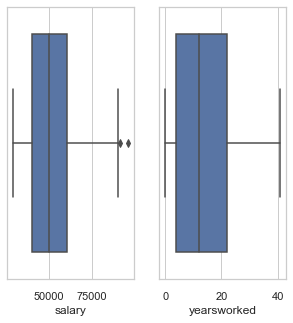

In [183]:
# Check for extreme values

sns.set()
sns.set(style="whitegrid")
fig, axes = plt.subplots(1,2, figsize=(5, 5))
sns.boxplot(x=salaries["salary"], ax=axes[0], data = salaries)
sns.boxplot(x=salaries["yearsworked"], ax=axes[1],data = salaries);
q3,q1 = np.percentile(salaries, [75,25])
IQR = q3-q1

In [184]:
# Removing the outliers
new_salaries = salaries[~((salaries <(q1-1.5*IQR))| (salaries > (q3+1.5*IQR))).any(axis=1)]

##### Outliers

Using the box plot method have observed <b> two outliers</b> for the salary values, and <b>none</b> for the yearsworked values. 
How we intend on dealing with the outliers is to <b>remove </b> them, so that the model that we will build will not be affected.

### 2.4 Spliting data

In [185]:
#Split our data
x = salaries[['exprior','yearsworked','yearsrank','market','degree','otherqual','position', 'male','Field','yearsabs']]
y = salaries['salary']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
# y_train = pd.DataFrame(y_train)
combined = pd.concat([X_train, y_train], axis=1)

In [186]:
#one hot encoding

# field = pd.get_dummies(combined['Field'])
# field.drop(1, inplace=True, axis=1)

# new_field = field.rename(columns={2:'Finance',3:'HR',4:'Marketing'})

# combined = pd.concat([combined, new_field] ,axis=1, ignore_index=False)
# combined.drop("Field", inplace=True, axis=1)
# combined.head(1)

## 3. Exploratory data analysis (EDA)

### 3.1 Multi-variate graphs

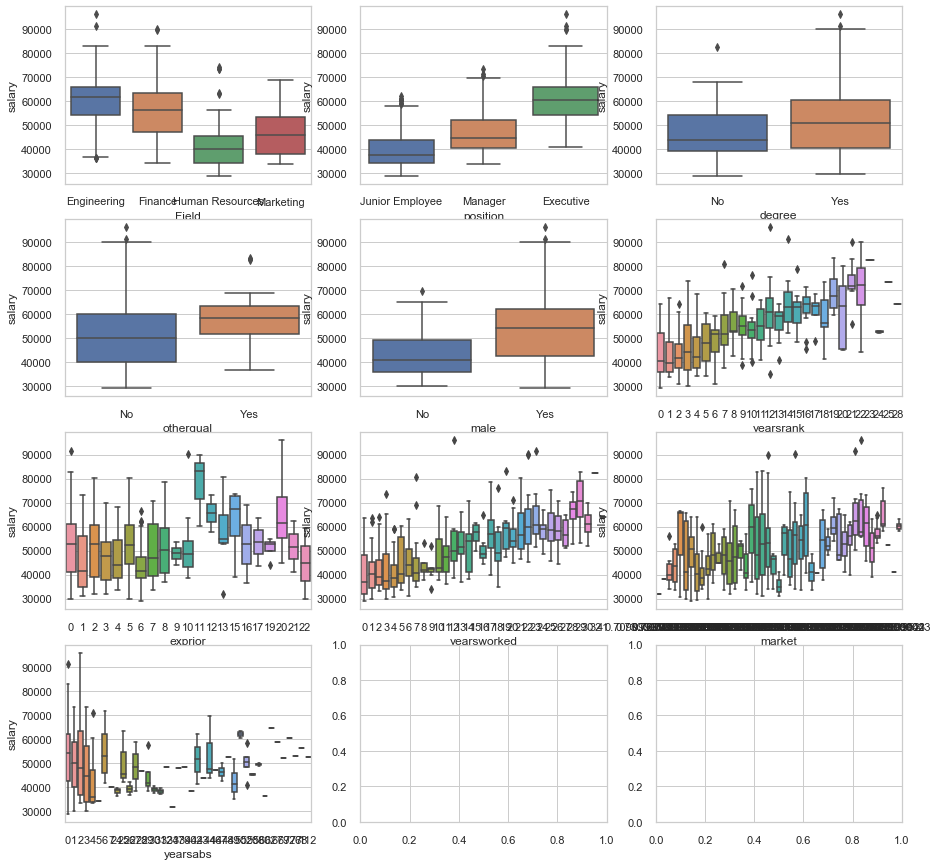

In [187]:
sns.set()
sns.set(style="whitegrid")
fig, axes = plt.subplots(4,3, figsize=(15, 15))
lx = sns.boxplot(combined.Field,combined.salary, ax=axes[0,0], data = combined)
mx = sns.boxplot(combined.position,combined.salary, ax=axes[0,1], data = combined)
nx = sns.boxplot(combined.degree,combined.salary, ax=axes[0,2], data = combined)
ox = sns.boxplot(combined.otherqual,combined.salary, ax=axes[1,0], data = combined)
px = sns.boxplot(combined.male,combined.salary, ax=axes[1,1], data = combined)
qx = sns.boxplot(combined.yearsrank,combined.salary, ax=axes[1,2], data = combined)
rx = sns.boxplot(combined.exprior,combined.salary, ax=axes[2,0], data = combined)
sx = sns.boxplot(combined.yearsworked,combined.salary, ax=axes[2,1], data = combined)
tx = sns.boxplot(combined.market,combined.salary, ax=axes[2,2], data = combined)
ax = sns.boxplot(combined.yearsabs,combined.salary, ax=axes[3,0], data = combined)

lx.set_xticklabels(['Engineering', 'Finance','Human Resources','Marketing'])
mx.set_xticklabels(['Junior Employee', 'Manager','Executive'])
nx.set_xticklabels(['No', 'Yes'])
ox.set_xticklabels(['No', 'Yes'])
px.set_xticklabels(['No', 'Yes'])


plt.show()

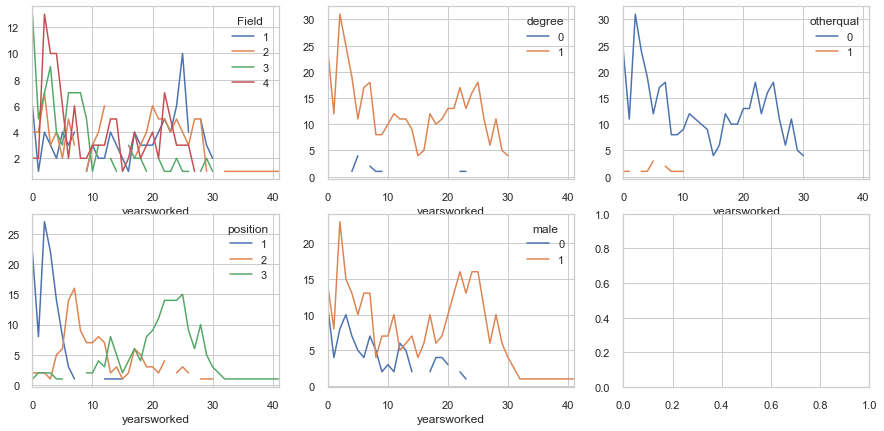

In [188]:
fig, ax = plt.subplots(2,3, figsize=(15,7))
# use unstack()
combined.groupby(['yearsworked','Field']).count()['salary'].unstack().plot(ax=ax[0,0])
combined.groupby(['yearsworked','degree']).count()['salary'].unstack().plot(ax=ax[0,1])
combined.groupby(['yearsworked','otherqual']).count()['salary'].unstack().plot(ax=ax[0,2]);
combined.groupby(['yearsworked','position']).count()['salary'].unstack().plot(ax=ax[1,0])
combined.groupby(['yearsworked','male']).count()['salary'].unstack().plot(ax=ax[1,1]);

In [189]:
import plotly.express as px
df = px.data.tips()
fig = px.histogram(combined, x="exprior", y="salary", color="Field",
                   marginal="box",
                   hover_data=combined.columns)
fig.show()

## 4. Modelling  

<b>Hypothesis testing: </b> <br>
H0: Does not have signficant relationship <br>
Ha: Has significant relationship

### 4.1 Fitting linear regression

In [190]:
# Fit regression model 
results = smf.ols('salary ~ exprior+yearsworked+yearsrank+market+degree+otherqual+position+male+Field+yearsabs', data=combined).fit()

# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     148.8
Date:                Sat, 28 Mar 2020   Prob (F-statistic):          4.30e-128
Time:                        11:54:49   Log-Likelihood:                -4149.4
No. Observations:                 411   AIC:                             8321.
Df Residuals:                     400   BIC:                             8365.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5732.3192   3017.053      1.900      

## 5 Linear Regression assumptions

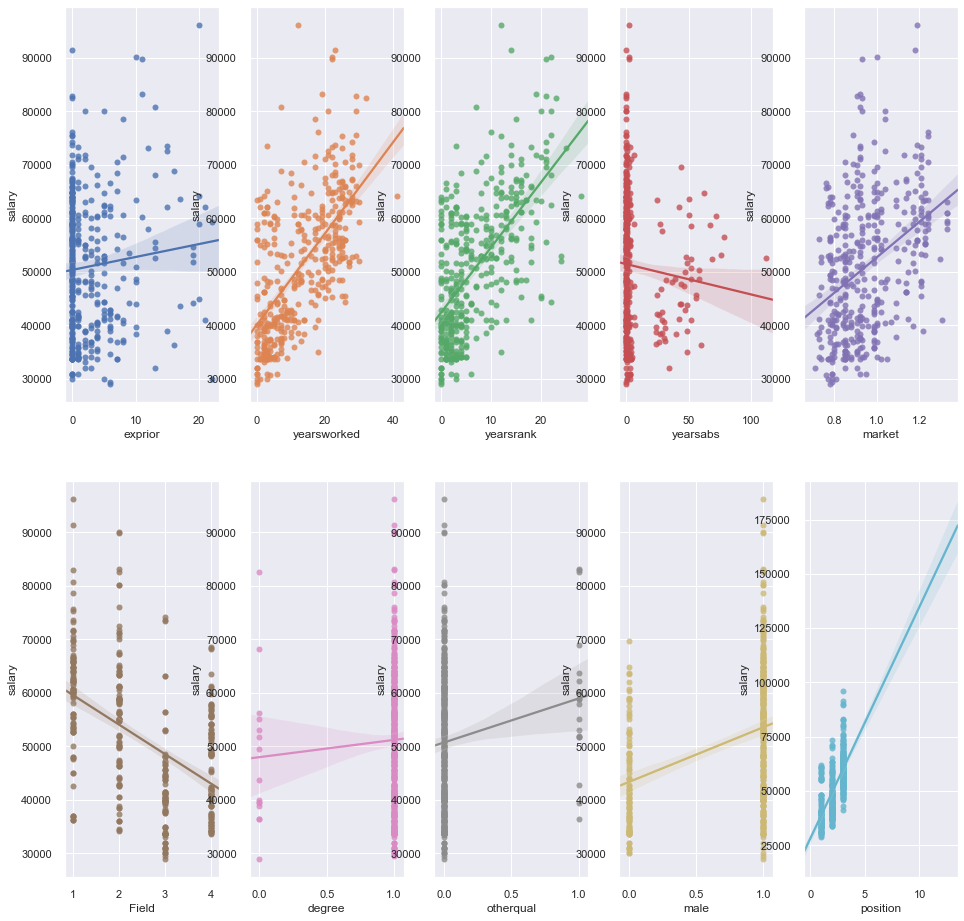

In [191]:
# 1. Linear relationship

sns.set()
# sns.set(style = 'whitegrid')
fig, axes = plt.subplots(2,5, figsize=(16,16))

sns.regplot(x=X_train['exprior'], y=y_train, ax= axes[0,0])
sns.regplot(x=X_train['yearsworked'], y=y_train,ax= axes[0,1]);
sns.regplot(x=X_train['yearsrank'], y=y_train, ax= axes[0,2])
sns.regplot(x=X_train['yearsabs'], y=y_train,ax= axes[0,3]);
sns.regplot(x=X_train['market'], y=y_train,ax= axes[0,4]);
sns.regplot(x=X_train['Field'], y=y_train,ax= axes[1,0]);
sns.regplot(x=X_train['degree'], y=y_train, ax= axes[1,1])
sns.regplot(x=X_train['otherqual'], y=y_train,ax= axes[1,2]);
sns.regplot(x=X_train['male'], y=y_train, ax= axes[1,3])
sns.regplot(x=X_train['position'], y=y_train,ax= axes[1,4]);



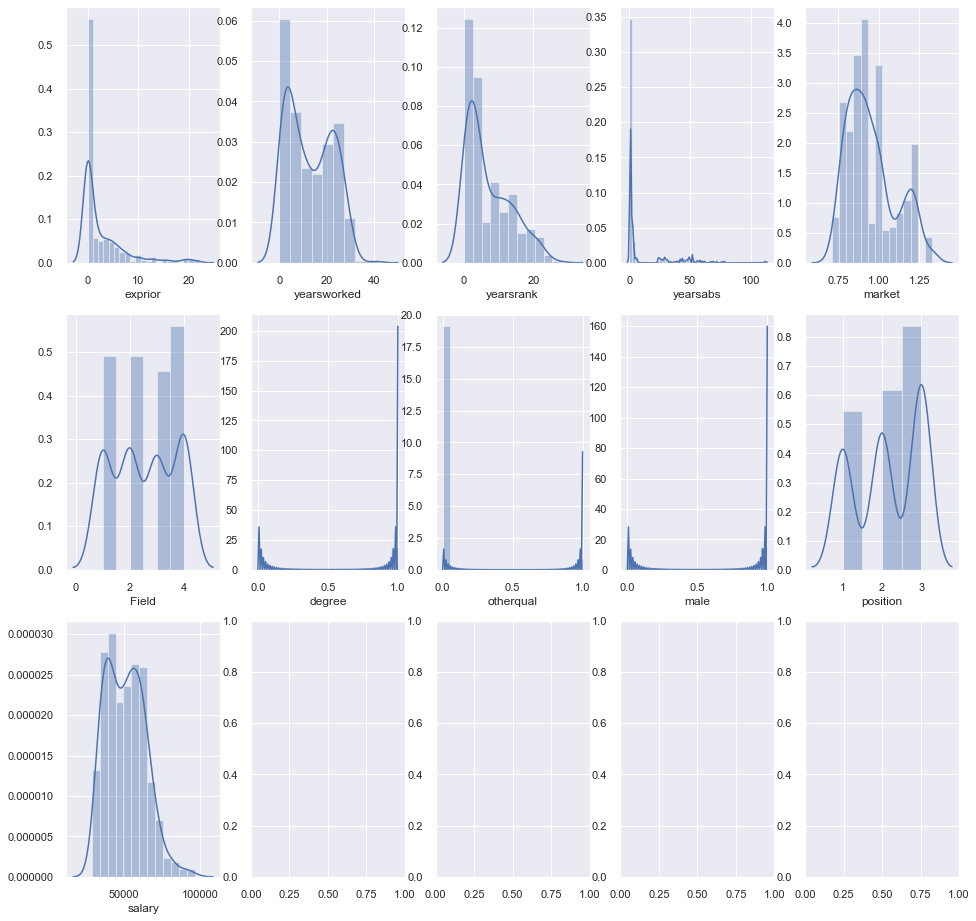

In [192]:
# 2. Multivariate normality

fig, axes = plt.subplots(3,5, figsize=(16,16))

sns.distplot(X_train['exprior'],ax= axes[0,0])
sns.distplot(X_train['yearsworked'],ax= axes[0,1]);
sns.distplot(X_train['yearsrank'],ax= axes[0,2])
sns.distplot(X_train['yearsabs'],ax= axes[0,3]);
sns.distplot(X_train['market'],ax= axes[0,4]);
sns.distplot(X_train['Field'],ax= axes[1,0]);
sns.distplot(X_train['degree'],ax= axes[1,1])
sns.distplot(X_train['otherqual'],ax= axes[1,2]);
sns.distplot(X_train['male'],ax= axes[1,3])
sns.distplot(X_train['position'],ax= axes[1,4]);
sns.distplot(combined['salary'],ax= axes[2,0]);


In [193]:
# 3. No or little multicollinearity

corr = X_train.corr()
corr.style.background_gradient(cmap='coolwarm')

,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
exprior,1,-0.248989,-0.0737138,-0.0653887,-0.0549906,0.23943,0.102679,0.0181044,-0.0625215,0.148268
yearsworked,-0.248989,1,0.819155,-0.0659657,0.0222325,-0.0363944,0.752261,0.272083,-0.238151,0.0262545
yearsrank,-0.0737138,0.819155,1,-0.00358048,0.00573417,0.00923927,0.489899,0.233528,-0.240363,-0.00128902
market,-0.0653887,-0.0659657,-0.00358048,1,0.0609505,-0.0133706,-0.050905,0.185026,-0.228017,-0.149445
degree,-0.0549906,0.0222325,0.00573417,0.0609505,1,-0.275367,0.0347194,0.0710728,-0.123634,0.0220736
otherqual,0.23943,-0.0363944,0.00923927,-0.0133706,-0.275367,1,0.136168,-0.017192,-0.0392866,0.00191122
position,0.102679,0.752261,0.489899,-0.050905,0.0347194,0.136168,1,0.288245,-0.27011,0.0366959
male,0.0181044,0.272083,0.233528,0.185026,0.0710728,-0.017192,0.288245,1,-0.138009,-0.671771
Field,-0.0625215,-0.238151,-0.240363,-0.228017,-0.123634,-0.0392866,-0.27011,-0.138009,1,-0.0084151
yearsabs,0.148268,0.0262545,-0.00128902,-0.149445,0.0220736,0.00191122,0.0366959,-0.671771,-0.0084151,1


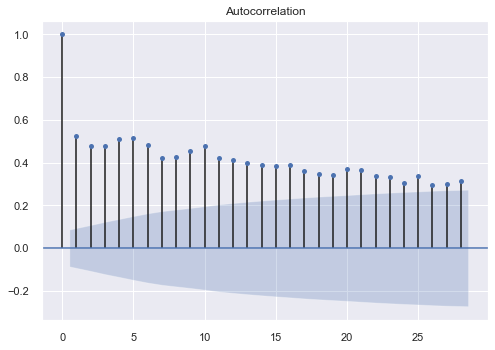

In [194]:
# 4. No auto-correlation

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(salaries['salary'])
plt.show()

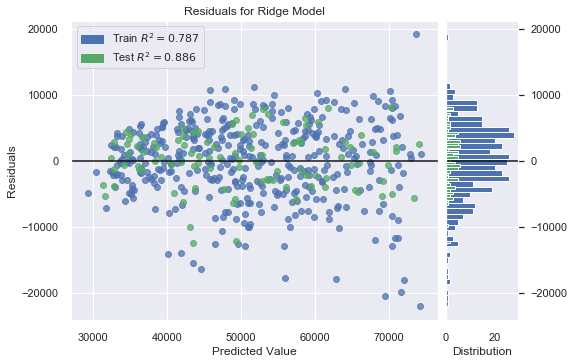

In [195]:
# 5. Homoscedasticity

regression = LinearRegression().fit(X_train, y_train)
model = Ridge()
visualizer = ResidualsPlot(model)

# visualizer = ResidualsPlot(regression)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.show();

### 3.4 RSME

In [196]:
# RSME for training dataset
train = results.predict(X_train)

m_s_e = sqrt(mse(y_train, train))
m_s_e

5865.560685933611

In [197]:
# RSME for test dataset
test = results.predict(X_test)

msse = sqrt(mse(y_test, test))
msse

4063.2001089209825

##### What is the difference in the Root Mean Square Error (RMSE) between the training and test sets? Is there any evidence of overfitting?

Our model performs better on the train dataset than it does on the test set. With this we can now conclude that the model is overfitted. We say this because our model shows low bias but high variance. To better train our model we need to identify relevant variables and terms that you are likely to influence our outcome that we hoping for

RMSE_train is bigger than  RMSE_test by slight margin therefore there is overfitting on our model.